# PART 1 

In [1]:
import pandas as pd
import numpy as np

In [2]:
# Replace 'input.dat' and 'output.csv' with your actual file names
input_file = 'movies.dat'
output_file = 'movies.csv'

# Specify the delimiter used in your .dat file, for example, '\t' for tab-separated values
delimiter = '\t'

# Specify the encoding of your .dat file, for example, 'ISO-8859-1'
file_encoding = 'ISO-8859-1'

# Read .dat file into a pandas DataFrame with the specified encoding
df = pd.read_csv(input_file, delimiter=delimiter, encoding=file_encoding)

# Write DataFrame to .csv file
df.to_csv(output_file, index=False)

print(f'Conversion from {input_file} to {output_file} completed.')


Conversion from movies.dat to movies.csv completed.


In [3]:
# Replace 'input.dat' and 'output.csv' with your actual file names
input_file = 'ratings.dat'
output_file = 'ratings.csv'

# Specify the delimiter used in your .dat file, for example, '\t' for tab-separated values
delimiter = '\t'

# Specify the encoding of your .dat file, for example, 'ISO-8859-1'
file_encoding = 'ISO-8859-1'

# Read .dat file into a pandas DataFrame with the specified encoding
df = pd.read_csv(input_file, delimiter=delimiter, encoding=file_encoding)

# Write DataFrame to .csv file
df.to_csv(output_file, index=False)

print(f'Conversion from {input_file} to {output_file} completed.')


Conversion from ratings.dat to ratings.csv completed.


In [4]:
# Replace 'input.dat' and 'output.csv' with your actual file names
input_file = 'users.dat'
output_file = 'users.csv'

# Specify the delimiter used in your .dat file, for example, '\t' for tab-separated values
delimiter = '\t'

# Specify the encoding of your .dat file, for example, 'ISO-8859-1'
file_encoding = 'ISO-8859-1'

# Read .dat file into a pandas DataFrame with the specified encoding
df = pd.read_csv(input_file, delimiter=delimiter, encoding=file_encoding)

# Write DataFrame to .csv file
df.to_csv(output_file, index=False)

print(f'Conversion from {input_file} to {output_file} completed.')


Conversion from users.dat to users.csv completed.


In [6]:

movies_columns = ["MovieID", "Title", "Genres"]
ratings_columns = ["UserID", "MovieID", "Rating", "Timestamp"]
users_columns = ["UserID", "Gender", "Age", "Occupation", "Zip Code"]

movies_df = pd.read_csv('movies.csv', sep='::', names=movies_columns)
ratings_df = pd.read_csv('ratings.csv',sep='::', header=None, names=ratings_columns)
users_df = pd.read_csv('users.csv',sep='::', header=None, names=users_columns)

/var/folders/3k/3lbygck964ldccpncrf48vsw0000gn/T/ipykernel_87610/2778830910.py:5: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  movies_df = pd.read_csv('movies.csv', sep='::', names=movies_columns)
/var/folders/3k/3lbygck964ldccpncrf48vsw0000gn/T/ipykernel_87610/2778830910.py:6: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  ratings_df = pd.read_csv('ratings.csv',sep='::', header=None, names=ratings_columns)
/var/folders/3k/3lbygck964ldccpncrf48vsw0000gn/T/ipykernel_87610/2778830910.py:7: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separato

In [7]:
movies_df.head()

,MovieID,Title,Genres
0,1,Toy Story (1995),Animation|Children's|Comedy
1,2,Jumanji (1995),Adventure|Children's|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama
4,5,Father of the Bride Part II (1995),Comedy


In [8]:
ratings_df.head()

,UserID,MovieID,Rating,Timestamp
0,1,1193,5,978300760
1,1,661,3,978302109
2,1,914,3,978301968
3,1,3408,4,978300275
4,1,2355,5,978824291


In [9]:
users_df.head()

,UserID,Gender,Age,Occupation,Zip Code
0,1,F,1,10,48067
1,2,M,56,16,70072
2,3,M,25,15,55117
3,4,M,45,7,02460
4,5,M,25,20,55455


In [10]:
# Merge the ratings data with the users data to create a combined dataframe
combined_data = pd.merge(ratings_df, users_df, on="UserID")

# Create the initial m x u matrix using pivot_table
movie_user_matrix = combined_data.pivot_table(index="MovieID", columns="UserID", values="Rating")
movie_user_matrix

# Fill NaN values (movies not rated by users) with 0
movie_user_matrix.fillna(0, inplace=True)

# Normalize the matrix using z-score normalization
z_score_matrix = (movie_user_matrix - movie_user_matrix.mean()) / (movie_user_matrix.std())

# Display the normalized matrix
print("Normalized Matrix:")
z_score_matrix

Normalized Matrix:


UserID,1,2,3,4,5,6,7,8,9,10,...,6031,6032,6033,6034,6035,6036,6037,6038,6039,6040
MovieID,,,,,,,,,,,,,,,,,,,,,
1,9.804008,-0.183154,-0.114537,-0.073196,-0.22285,7.176856,-0.09052,5.074627,7.670556,3.483171,...,-0.110003,5.517230,-0.124909,-0.073631,4.724035,-0.528899,-0.23332,-0.070846,-0.181969,2.440741
2,-0.118882,-0.183154,-0.114537,-0.073196,-0.22285,-0.136660,-0.09052,-0.191844,-0.167505,3.483171,...,-0.110003,-0.164819,-0.124909,-0.073631,-0.245034,-0.528899,-0.23332,-0.070846,-0.181969,-0.300839
3,-0.118882,-0.183154,-0.114537,-0.073196,-0.22285,-0.136660,-0.09052,-0.191844,-0.167505,-0.340476,...,-0.110003,-0.164819,-0.124909,-0.073631,0.997233,-0.528899,-0.23332,-0.070846,-0.181969,-0.300839
4,-0.118882,-0.183154,-0.114537,-0.073196,-0.22285,-0.136660,-0.09052,3.758009,-0.167505,-0.340476,...,-0.110003,-0.164819,-0.124909,-0.073631,2.239500,0.807684,-0.23332,-0.070846,-0.181969,-0.300839
5,-0.118882,-0.183154,-0.114537,-0.073196,-0.22285,-0.136660,-0.09052,-0.191844,-0.167505,-0.340476,...,-0.110003,-0.164819,-0.124909,-0.073631,0.997233,-0.528899,-0.23332,-0.070846,-0.181969,-0.300839
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3948,-0.118882,-0.183154,-0.114537,-0.073196,-0.22285,-0.136660,-0.09052,-0.191844,4.535332,2.718442,...,-0.110003,-0.164819,-0.124909,-0.073631,-0.245034,-0.528899,-0.23332,-0.070846,-0.181969,-0.300839
3949,-0.118882,-0.183154,-0.114537,-0.073196,-0.22285,-0.136660,-0.09052,-0.191844,-0.167505,-0.340476,...,-0.110003,-0.164819,-0.124909,-0.073631,-0.245034,-0.528899,-0.23332,-0.070846,-0.181969,-0.300839
3950,-0.118882,-0.183154,-0.114537,-0.073196,-0.22285,-0.136660,-0.09052,-0.191844,-0.167505,-0.340476,...,-0.110003,-0.164819,-0.124909,-0.073631,-0.245034,-0.528899,-0.23332,-0.070846,-0.181969,-0.300839


In [11]:
U, S, Vt = np.linalg.svd(z_score_matrix, full_matrices = False)
print("Shape of U:", U.shape)
print("Shape of S:", S.shape)
print("Shape of Vt:", Vt.shape)

Shape of U: (3706, 3706)
Shape of S: (3706,)
Shape of Vt: (3706, 6040)


In [12]:
U

array([[ 8.48994577e-02, -1.98362830e-02,  4.05823584e-02, ...,
         5.83317405e-12,  1.42247159e-12, -4.01694807e-13],
       [ 1.18705057e-02,  2.59919618e-02,  2.82688461e-03, ...,
         5.83320568e-12,  1.42241415e-12, -4.01762910e-13],
       [ 3.81558204e-03,  6.15568174e-03,  1.41212039e-02, ...,
         5.83323359e-12,  1.42243664e-12, -4.01647248e-13],
       ...,
       [-7.76380106e-03, -6.56079240e-04,  6.67852236e-04, ...,
         5.83324962e-12,  1.42251445e-12, -4.01625264e-13],
       [-8.28316977e-03, -1.38226562e-03,  1.82995078e-03, ...,
         5.83319576e-12,  1.42248806e-12, -4.01689581e-13],
       [ 4.55260560e-03, -1.08551039e-02,  1.47489204e-02, ...,
         5.83316717e-12,  1.42244664e-12, -4.01698490e-13]])

In [13]:
S

array([1.65002390e+03, 7.72222273e+02, 7.38047199e+02, ...,
       1.27197401e-13, 1.27197401e-13, 1.27197401e-13])

In [14]:
Vt

array([[ 0.01084796,  0.01432028,  0.01320323, ...,  0.00506512,
         0.00885683,  0.01630522],
       [-0.00740186,  0.0030458 ,  0.00523174, ..., -0.00492517,
        -0.01477093, -0.02560488],
       [ 0.00072875,  0.0009968 , -0.00255497, ..., -0.00363681,
        -0.02214009, -0.02142038],
       ...,
       [-0.00026042, -0.00205517,  0.02692234, ...,  0.01969933,
         0.00321132,  0.00248305],
       [ 0.00193434, -0.01858015,  0.01709394, ..., -0.02368773,
         0.00564503,  0.00464489],
       [-0.00344755,  0.0007109 ,  0.02626308, ..., -0.00827485,
        -0.00653292,  0.00461666]])

In [15]:
top_components = 50
S_50 = np.diag(S[:top_components])
# Display the shape of the truncated S matrix
print("Shape of truncated S:", S_50.shape)
S_50

Shape of truncated S: (50, 50)


array([[1650.02389723,    0.        ,    0.        , ...,    0.        ,
           0.        ,    0.        ],
       [   0.        ,  772.22227271,    0.        , ...,    0.        ,
           0.        ,    0.        ],
       [   0.        ,    0.        ,  738.04719902, ...,    0.        ,
           0.        ,    0.        ],
       ...,
       [   0.        ,    0.        ,    0.        , ...,  224.41508509,
           0.        ,    0.        ],
       [   0.        ,    0.        ,    0.        , ...,    0.        ,
         223.08889529,    0.        ],
       [   0.        ,    0.        ,    0.        , ...,    0.        ,
           0.        ,  219.90385798]])

In [16]:
U_50 = U[:, :top_components]
# Display the shape of the truncated S matrix
print("Shape of truncated S:", U_50.shape)
U_50

Shape of truncated S: (3706, 50)


array([[ 0.08489946, -0.01983628,  0.04058236, ...,  0.00350209,
        -0.00668788,  0.11534889],
       [ 0.01187051,  0.02599196,  0.00282688, ..., -0.02251568,
        -0.00782581, -0.01243373],
       [ 0.00381558,  0.00615568,  0.0141212 , ...,  0.00111241,
        -0.02885255, -0.01225735],
       ...,
       [-0.0077638 , -0.00065608,  0.00066785, ..., -0.00310179,
         0.00521145,  0.00119757],
       [-0.00828317, -0.00138227,  0.00182995, ..., -0.00080272,
         0.00578122, -0.00047081],
       [ 0.00455261, -0.0108551 ,  0.01474892, ...,  0.00618706,
         0.03422198, -0.0038517 ]])

In [17]:
Vt_50 = Vt[:top_components, :]
# Display the shape of the truncated S matrix
print("Shape of truncated S:", Vt_50.shape)
Vt_50

Shape of truncated S: (50, 6040)


array([[ 0.01084796,  0.01432028,  0.01320323, ...,  0.00506512,
         0.00885683,  0.01630522],
       [-0.00740186,  0.0030458 ,  0.00523174, ..., -0.00492517,
        -0.01477093, -0.02560488],
       [ 0.00072875,  0.0009968 , -0.00255497, ..., -0.00363681,
        -0.02214009, -0.02142038],
       ...,
       [ 0.01616353, -0.0034459 ,  0.00494809, ...,  0.01172849,
         0.0120055 ,  0.00975208],
       [-0.02853217,  0.00392519, -0.01548148, ...,  0.00114426,
         0.00583587,  0.00150019],
       [ 0.02016481, -0.00203337,  0.02391903, ...,  0.00778439,
         0.00441803, -0.00551331]])

In [18]:
# Calculate the covariance matrix
cov_matrix = np.cov(z_score_matrix, rowvar=False)
# Perform eigenvalue decomposition on the covariance matrix
eigenvalues, eigenvectors = np.linalg.eig(cov_matrix)

In [19]:
# Sort eigenvalues and corresponding eigenvectors in descending order
sorted_indices = np.argsort(eigenvalues)[::-1]
eigenvalues = eigenvalues[sorted_indices]
eigenvectors = eigenvectors[:, sorted_indices]

In [20]:
# Select the top 50 eigenvectors
top_50_eigenvectors = eigenvectors[:, :50]

In [21]:
# Display the shape of the top 50 eigenvectors matrix
print("Shape of top 50 eigenvectors:", top_50_eigenvectors.shape)
top_50_eigenvectors

Shape of top 50 eigenvectors: (6040, 50)


array([[ 0.01084796+0.j, -0.00740186+0.j,  0.00072875+0.j, ...,
        -0.01616353+0.j, -0.02853217+0.j,  0.02016481+0.j],
       [ 0.01432028+0.j,  0.0030458 +0.j,  0.0009968 +0.j, ...,
         0.0034459 +0.j,  0.00392519+0.j, -0.00203337+0.j],
       [ 0.01320323+0.j,  0.00523174+0.j, -0.00255497+0.j, ...,
        -0.00494809+0.j, -0.01548148+0.j,  0.02391903+0.j],
       ...,
       [ 0.00506512+0.j, -0.00492517+0.j, -0.00363681+0.j, ...,
        -0.01172849+0.j,  0.00114426+0.j,  0.00778439+0.j],
       [ 0.00885683+0.j, -0.01477093+0.j, -0.02214009+0.j, ...,
        -0.0120055 +0.j,  0.00583587+0.j,  0.00441803+0.j],
       [ 0.01630522+0.j, -0.02560488+0.j, -0.02142038+0.j, ...,
        -0.00975208+0.j,  0.00150019+0.j, -0.00551331+0.j]])

In [22]:
from sklearn.metrics.pairwise import cosine_similarity

# Compute the representations of movies in the 50-dimensional space
movie_representations = np.dot(U, np.dot(np.diag(S), Vt))

# Calculate the cosine similarity between movie representations
cosine_sim = cosine_similarity(movie_representations, movie_representations)

# Get the indices of the top 10 closest movies for each movie
num_closest_movies = 10
closest_movies_indices = np.argsort(-cosine_sim, axis=1)[:, 1:num_closest_movies + 1]

# Replace this list with the movie titles you have
movie_titles = movies_df["Title"].values

# Function to get the movie titles for a list of indices
def get_movie_titles(movie_indices):
    return [movie_titles[i] for i in movie_indices]

# Example: Find the 10 closest movies for a specific movie (e.g., movie with index 0)
movie_index_to_search = 0
closest_movies = get_movie_titles(closest_movies_indices[movie_index_to_search])

# Display the 10 closest movies for the specified movie
print(f"10 closest movies to '{movie_titles[movie_index_to_search]}':")
for i, movie in enumerate(closest_movies):
    print(f"{i + 1}. {movie}")


10 closest movies to 'Toy Story (1995)':
1. Bad Seed, The (1956)
2. Tie Me Up! Tie Me Down! (1990)
3. Hour of the Pig, The (1993)
4. Babe (1995)
5. Rounders (1998)
6. One True Thing (1998)
7. Higher Learning (1995)
8. Paulie (1998)
9. Brady Bunch Movie, The (1995)
10. Client, The (1994)


# PART 2

## Data Exploration 

In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statistics as sts
from sklearn.linear_model import LinearRegression

In [24]:
#importing the dataset and displaying the first 5 rows of the data
import pandas as pd
data_hp = pd.read_csv('HousePrice.csv')
data_hp.head()

,date,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,SalesPrice
0,5/2/14 0:00,3,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,313000.0
1,5/2/14 0:00,5,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,2384000.0
2,5/2/14 0:00,3,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,342000.0
3,5/2/14 0:00,3,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,420000.0
4,5/2/14 0:00,4,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,550000.0


In [25]:
# Exploring the structure of the dataset
data_hp.describe()
data_hp.info()
data_hp.dtypes  
data_hp.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4600 entries, 0 to 4599
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           4600 non-null   object 
 1   bedrooms       4600 non-null   int64  
 2   bathrooms      4600 non-null   float64
 3   sqft_living    4600 non-null   int64  
 4   sqft_lot       4600 non-null   int64  
 5   floors         4600 non-null   float64
 6   waterfront     4600 non-null   int64  
 7   view           4600 non-null   int64  
 8   condition      4600 non-null   int64  
 9   sqft_above     4600 non-null   int64  
 10  sqft_basement  4600 non-null   int64  
 11  yr_built       4600 non-null   int64  
 12  yr_renovated   4600 non-null   int64  
 13  SalesPrice     4600 non-null   float64
dtypes: float64(3), int64(10), object(1)
memory usage: 503.3+ KB


(4600, 14)

In [26]:
print("The Shape of the Dataset:", data_hp.shape)
print("\nData Types of Every Column:\n", data_hp.dtypes)

The Shape of the Dataset: (4600, 14)

Data Types of Every Column:
 date              object
bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
SalesPrice       float64
dtype: object


In [27]:
# Verifying the same thing with code:

Features_data = data_hp.drop('SalesPrice', axis=1)
Target_data= data_hp['SalesPrice']
print("The Features in the dataset are :\n", Features_data.columns)
print("\nThe Target Variable in the dataset is :\n", Target_data.name)

The Features in the dataset are :
 Index(['date', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'sqft_above', 'sqft_basement',
       'yr_built', 'yr_renovated'],
      dtype='object')

The Target Variable in the dataset is :
 SalesPrice


In [28]:
dataset_samples = data_hp.shape[0]
print(f" The Dataset has {dataset_samples} rows or samples")
missing_values_data = data_hp.isnull().sum().sum()
print(f" The Dataset has {missing_values_data} missing values")

 The Dataset has 4600 rows or samples
 The Dataset has 0 missing values


In [29]:
summary_data = data_hp.describe()
print(" The Summary Statistics for Continuous Features in the dataset :\n")
(summary_data)

 The Summary Statistics for Continuous Features in the dataset :



,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,SalesPrice
count,4600.000000,4600.000000,4600.000000,4.600000e+03,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4.600000e+03
mean,3.400870,2.160815,2139.346957,1.485252e+04,1.512065,0.007174,0.240652,3.451739,1827.265435,312.081522,1970.786304,808.608261,5.519630e+05
std,0.908848,0.783781,963.206916,3.588444e+04,0.538288,0.084404,0.778405,0.677230,862.168977,464.137228,29.731848,979.414536,5.638347e+05
min,0.000000,0.000000,370.000000,6.380000e+02,1.000000,0.000000,0.000000,1.000000,370.000000,0.000000,1900.000000,0.000000,0.000000e+00
25%,3.000000,1.750000,1460.000000,5.000750e+03,1.000000,0.000000,0.000000,3.000000,1190.000000,0.000000,1951.000000,0.000000,3.228750e+05
50%,3.000000,2.250000,1980.000000,7.683000e+03,1.500000,0.000000,0.000000,3.000000,1590.000000,0.000000,1976.000000,0.000000,4.609435e+05
75%,4.000000,2.500000,2620.000000,1.100125e+04,2.000000,0.000000,0.000000,4.000000,2300.000000,610.000000,1997.000000,1999.000000,6.549625e+05
max,9.000000,8.000000,13540.000000,1.074218e+06,3.500000,1.000000,4.000000,5.000000,9410.000000,4820.000000,2014.000000,2014.000000,2.659000e+07


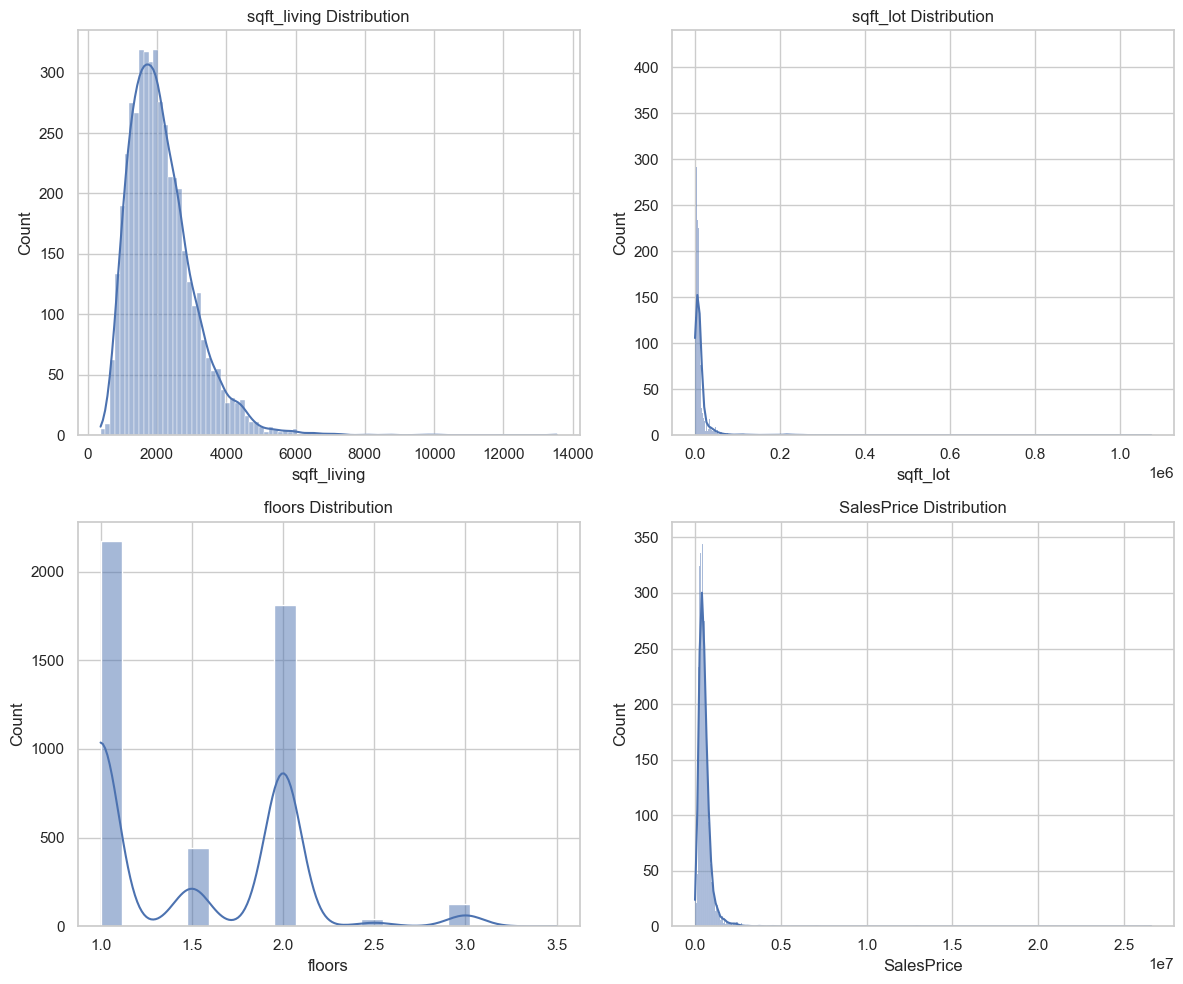

In [30]:
# Set the style for seaborn
sns.set(style="whitegrid")

# Visualize the distribution of each feature
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 10))

# Distribution of sqft_living
sns.histplot(data_hp['sqft_living'], kde=True, ax=axes[0, 0]).set_title('sqft_living Distribution')

# Distribution of sqft_lot
sns.histplot(data_hp['sqft_lot'], kde=True, ax=axes[0, 1]).set_title('sqft_lot Distribution')

# Distribution of floors
sns.histplot(data_hp['floors'], kde=True, ax=axes[1, 0]).set_title('floors Distribution')

# Distribution of SalesPrice
sns.histplot(data_hp['SalesPrice'], kde=True, ax=axes[1, 1]).set_title('SalesPrice Distribution')

plt.tight_layout()
plt.show()


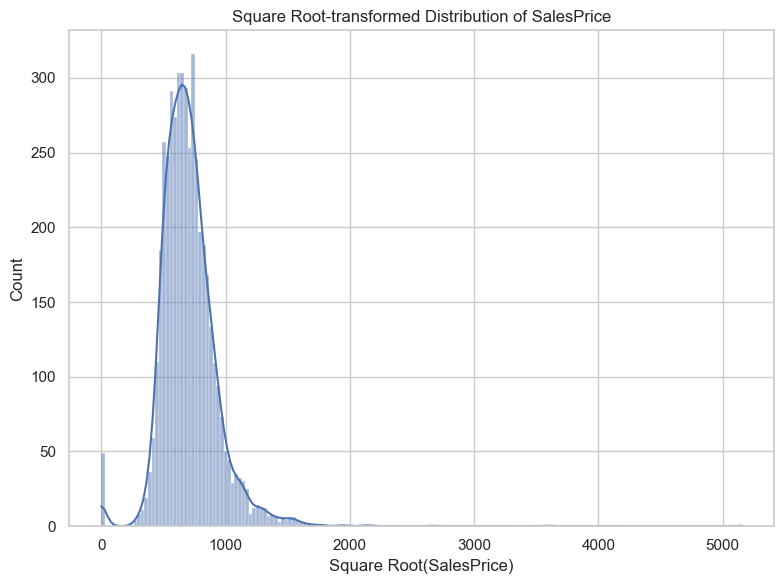

In [31]:
# Create a figure and axes
fig, axes = plt.subplots(1, 1, figsize=(8, 6))

# Plot the histogram with a square root transformation on the y-axis
sns.histplot(data_hp['SalesPrice']**0.5, kde=True, ax=axes)
axes.set_title('Square Root-transformed Distribution of SalesPrice')
axes.set_xlabel('Square Root(SalesPrice)')  # Update x-axis label

# Adjust layout
plt.tight_layout()
plt.show()

## Linear Regression (Single Variable)


In [32]:
#defining the independent and target. variable

A = data_hp['sqft_lot'].values.reshape(-1, 1)
B= data_hp['SalesPrice'].values
A = np.hstack((np.ones_like(A), A))
theta = np.linalg.inv(A.T @ A) @ A.T @ B           # calculating the coefficients
intercept, coef_sqft_lot = theta[0], theta[1]      # finding the intercept for independent variable

# displaying the intercept and coefficient

print("Intercept:", intercept)
print("Coefficient for sqft_lot:", coef_sqft_lot)

Intercept: 540189.1512958275
Coefficient for sqft_lot: 0.7927166756315326


In [33]:
predicted_values = A @ theta
SSE = (predicted_values - B) ** 2
SSE_model = SSE.sum()   # calculating the sse 
print("The Sum of Squared Errors (SSE) of the model is :", SSE_model)

The Sum of Squared Errors (SSE) of the model is : 1458344675295682.8


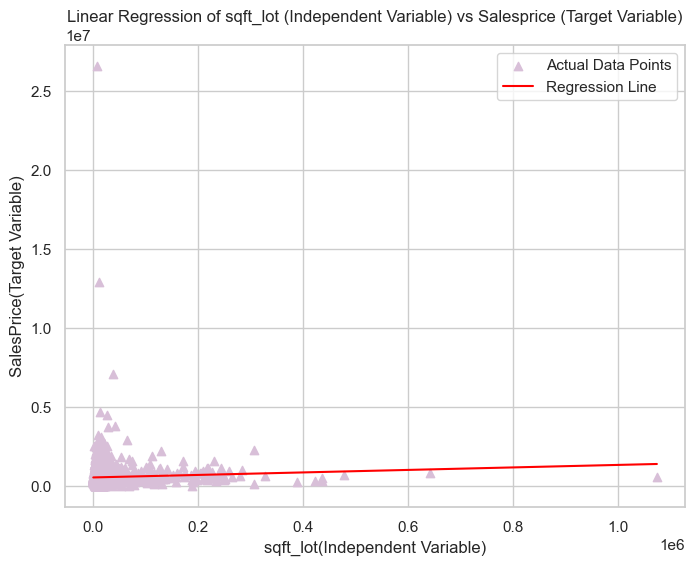

In [34]:
plt.figure(figsize=(8, 6))
plt.scatter(data_hp['sqft_lot'], data_hp['SalesPrice'], color='thistle', label='Actual Data Points', marker='^')
x_values = np.linspace(min(data_hp['sqft_lot']), max(data_hp['sqft_lot']), 100)
y_values = intercept + coef_sqft_lot * x_values
plt.plot(x_values, y_values, color='red', label='Regression Line')
plt.xlabel('sqft_lot(Independent Variable)')
plt.ylabel('SalesPrice(Target Variable)')
plt.title('Linear Regression of sqft_lot (Independent Variable) vs Salesprice (Target Variable)')
plt.legend()
plt.show()

In [35]:
#calculating the coefficients and intercept using sklearn package

from sklearn.linear_model import LinearRegression

A_sklearn = data_hp['sqft_lot'].values.reshape(-1, 1)
B_sklearn = data_hp['SalesPrice'].values
sk_model = LinearRegression()
sk_model.fit(A_sklearn, B_sklearn)
sk_coef = sk_model.coef_[0]
sk_intercept = sk_model.intercept_

print("The model's coefficient and intercept using scikit-learn are: \nCoefficient:", sk_coef, "\nIntercept:", sk_intercept)

The model's coefficient and intercept using scikit-learn are: 
Coefficient: 0.7927166756315298 
Intercept: 540189.1512958275


In [36]:
epsilon = 1e-5  #giving the threshold value because to accurately compare the both models
if abs(sk_coef - coef_sqft_lot) < epsilon and abs(sk_intercept - intercept) < epsilon:
    print("Result: Both models give the same intercept and coefficient.")
else:
    print("Result: Models have different intercept or coefficient.")

Result: Both models give the same intercept and coefficient.


## Linear Regression (Multivariate) 

In [37]:
from sklearn.linear_model import LinearRegression

# Extracting the independent variables (features) and the target variable
P_multi_model = data_hp[['sqft_living', 'sqft_lot']]
Q_multi_model = data_hp['SalesPrice']

# Creating a Linear Regression model using sklearn
multi_features_model = LinearRegression()

# Fitting the sklearn model with multiple features
multi_features_model.fit(P_multi_model, Q_multi_model)

# Retrieving coefficients and intercept from sklearn model with multiple features
multi_model_coefs = multi_features_model.coef_
multi_model_intercept = multi_features_model.intercept_

# Displaying coefficients and intercept from the sklearn model with multiple features
print("The multivariate model has intercept and coefficient as:")
print("Intercept:", multi_model_intercept)
print("Coefficients:", multi_model_coefs)

The multivariate model has intercept and coefficient as:
Intercept: 11681.165815590997
Coefficients: [257.13000008  -0.66039049]


In [38]:
# 11. Printing R-squared (R²) score

from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

X_multiple = data_hp[['sqft_living', 'sqft_lot']]  
y_multiple = data_hp['SalesPrice']  

# Creating a Linear Regression model using sklearn
sklearn_model_multiple = LinearRegression()

# Fitting the sklearn model with multiple features
sklearn_model_multiple.fit(X_multiple, y_multiple)

# Calculating R² score using the score() method
r_squared = sklearn_model_multiple.score(X_multiple, y_multiple)
print(f"R-squared (R²) score: {r_squared}")

# Alternatively, R² score can also be calculated using the r2_score() function
y_predicted = sklearn_model_multiple.predict(X_multiple)
r_squared_alt = r2_score(y_multiple, y_predicted)
print(f"R-squared (R²) score calculated using r2_score(): {r_squared_alt}")


R-squared (R²) score: 0.18694097425375722
R-squared (R²) score calculated using r2_score(): 0.18694097425375722


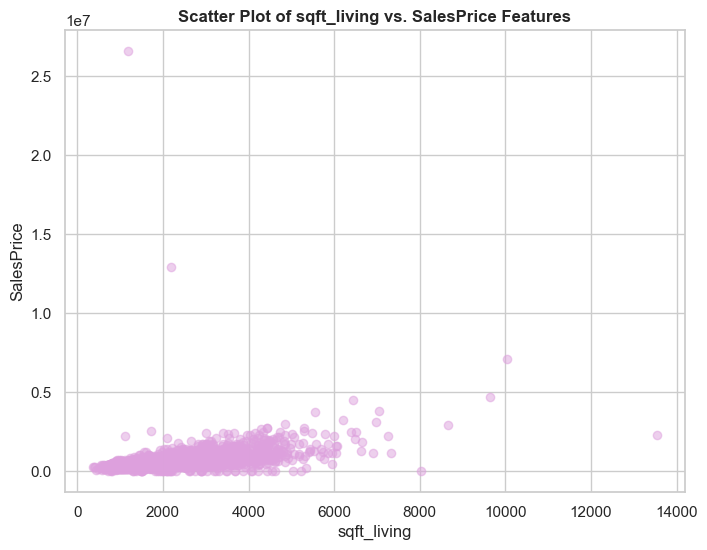

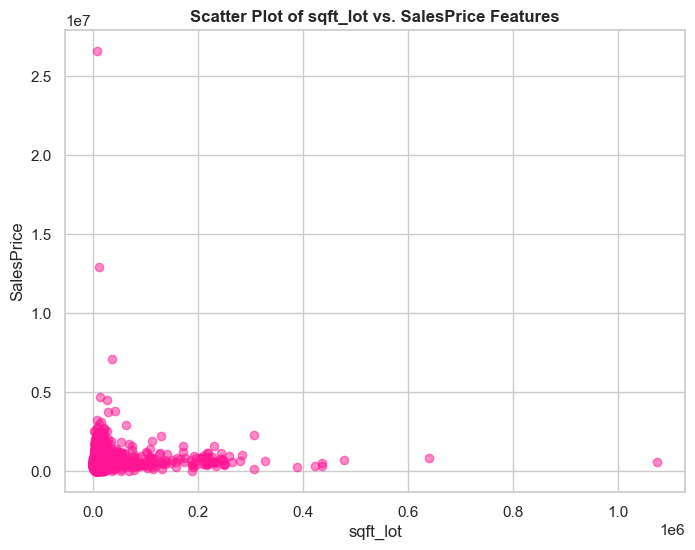

In [39]:
#plotting for sqft_living vs salesprice

plt.figure(figsize=(8, 6))
plt.scatter(data_hp['sqft_living'], data_hp['SalesPrice'], color='plum', alpha=0.5)
plt.title('Scatter Plot of sqft_living vs. SalesPrice Features',fontweight='bold')
plt.xlabel('sqft_living')
plt.ylabel('SalesPrice')
plt.grid(True)
plt.show()

#plotting for sqft_lot vs salesprice

plt.figure(figsize=(8, 6))
plt.scatter(data_hp['sqft_lot'], data_hp['SalesPrice'], color='deeppink', alpha=0.5)
plt.title('Scatter Plot of sqft_lot vs. SalesPrice Features',fontweight='bold')
plt.xlabel('sqft_lot')
plt.ylabel('SalesPrice')
plt.grid(True)
plt.show()

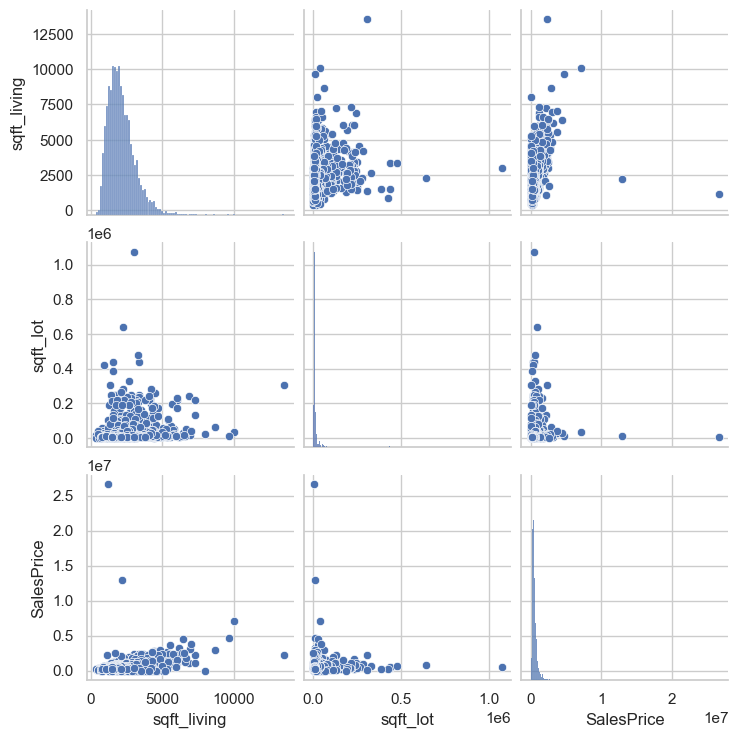

In [40]:
import seaborn as sns

# Extracting the selected features and the target variable
selected_features = ['sqft_living', 'sqft_lot']
X_selected = data_hp[selected_features]  # Selected features
y_selected = data_hp['SalesPrice']  # Target variable

# Combining features and target variable into a single DataFrame
data_to_plot = X_selected.copy()
data_to_plot['SalesPrice'] = y_selected

# Creating a pair plot to visualize relationships
sns.pairplot(data_to_plot)
sns.color_palette("rocket", as_cmap=True)
plt.show()

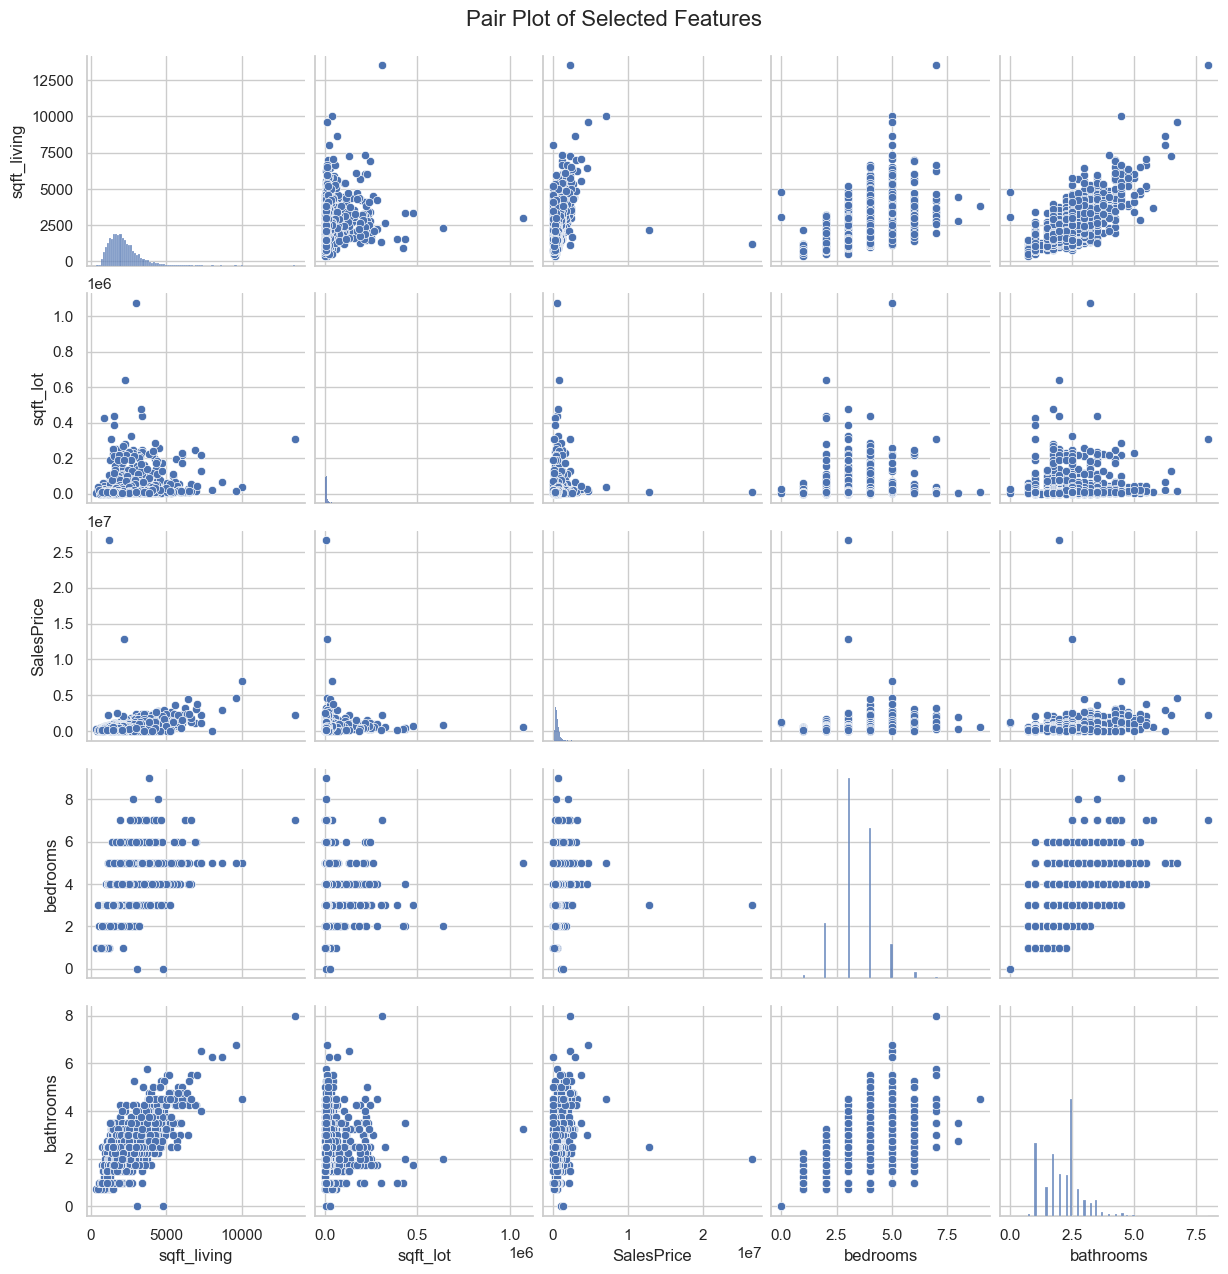

In [41]:
# Selecting a subset of features for the pair plot
selected_features = ['sqft_living', 'sqft_lot', 'SalesPrice', 'bedrooms', 'bathrooms']

# Creating a pair plot
sns.pairplot(data_hp[selected_features])
plt.suptitle('Pair Plot of Selected Features', y=1.02, size=16)
plt.show()

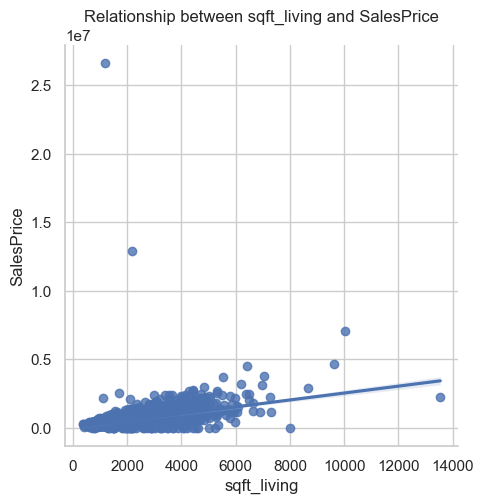

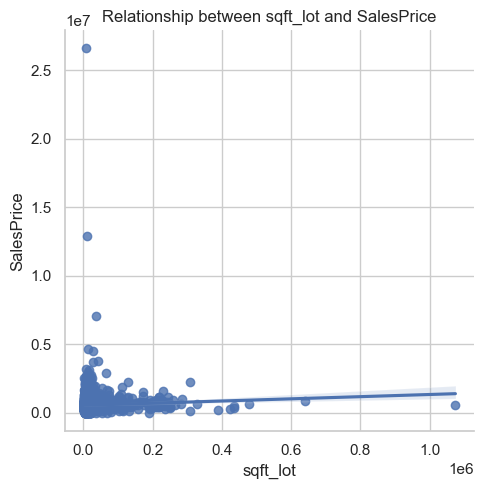

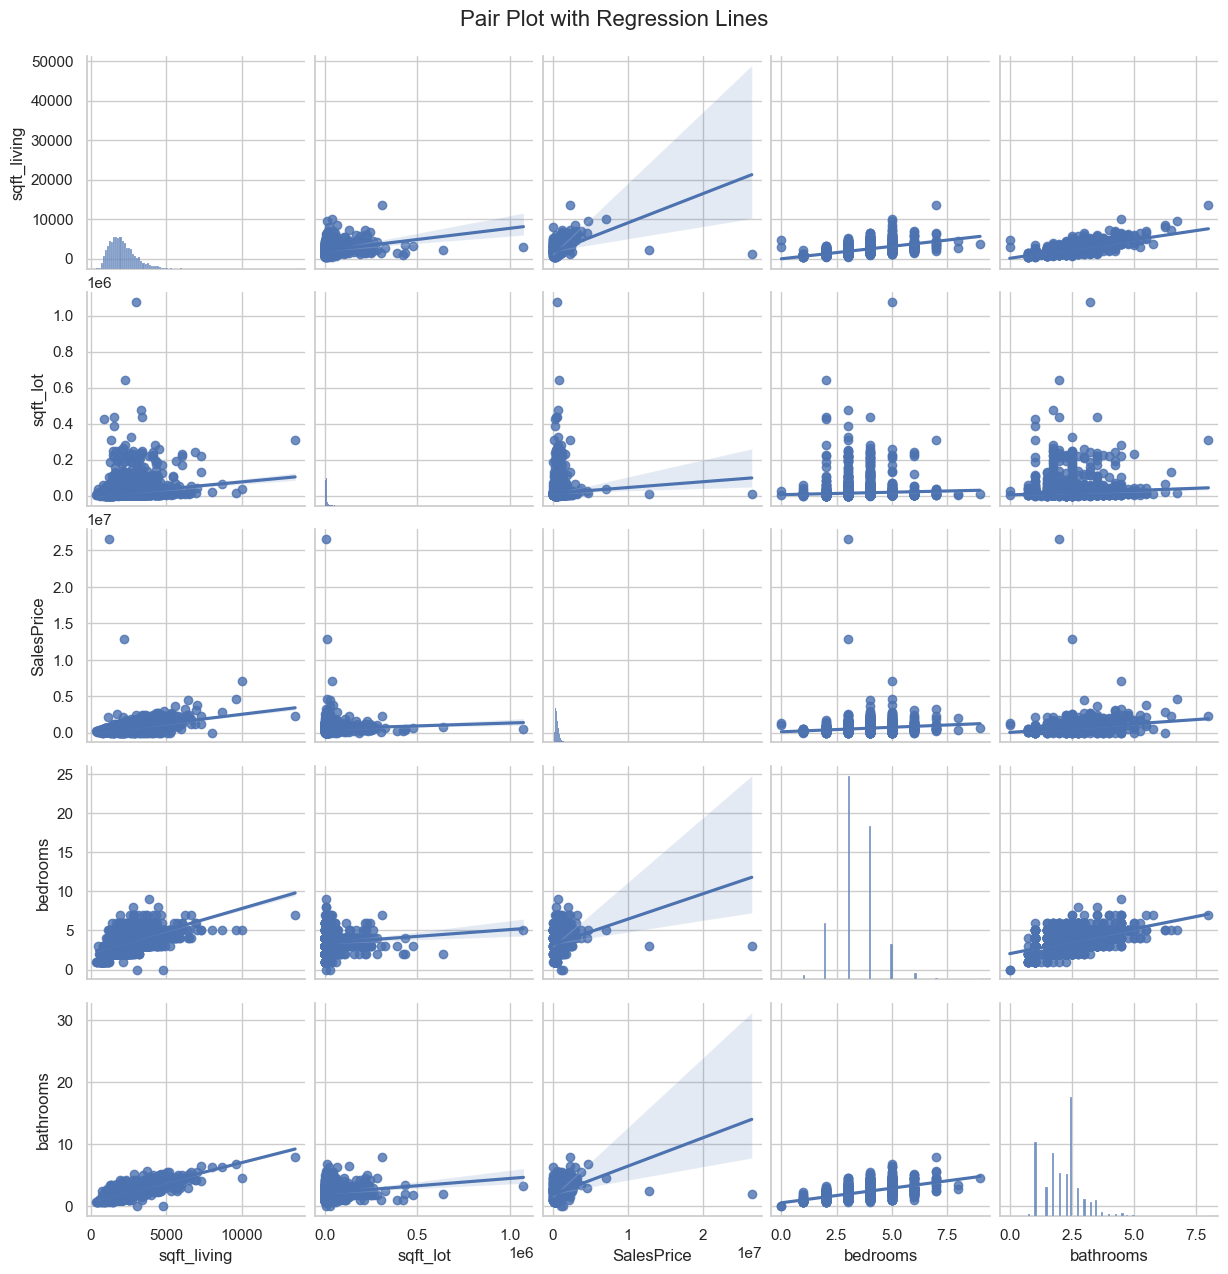

In [42]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set a custom style for the plots

# Create a scatter plot with regression lines for 'sqft_living' and 'SalesPrice'
sns.lmplot(x='sqft_living', y='SalesPrice', data=data_hp)
plt.title('Relationship between sqft_living and SalesPrice')

# Create another scatter plot with regression lines for 'sqft_lot' and 'SalesPrice'
sns.lmplot(x='sqft_lot', y='SalesPrice', data=data_hp)
plt.title('Relationship between sqft_lot and SalesPrice')

# Create a pair plot with regression lines for selected features
selected_features = ['sqft_living', 'sqft_lot', 'SalesPrice', 'bedrooms', 'bathrooms']
sns.pairplot(data_hp[selected_features], kind='reg')
plt.suptitle('Pair Plot with Regression Lines', y=1.02, size=16)

plt.show()



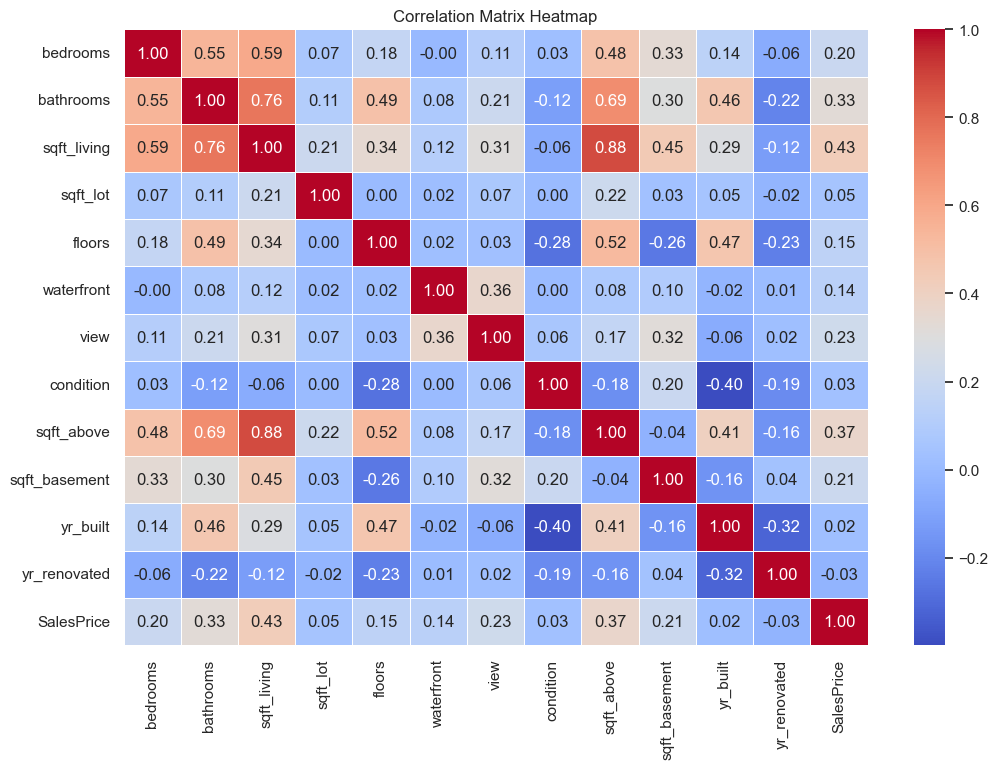

In [44]:
import seaborn as sns
import matplotlib.pyplot as plt

# Drop 'date' column
df_no_date = data_hp.drop(columns=['date'])

# Calculate the correlation matrix
correlation_matrix = df_no_date.corr()

# Set up a custom style for the heatmap
sns.set_theme(style="whitegrid")  # You can choose another style if preferred

# Create a heatmap to visualize the correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix Heatmap')
plt.show()

## Polynomial Regression

In [65]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

M = data_hp[['sqft_lot']]
N = data_hp['SalesPrice']

# Creating polynomial model of degree 2
poly_features = PolynomialFeatures(degree=2)
M_poly = poly_features.fit_transform(M)

# Implementing the polynomial regression model 
poly_reg_model = LinearRegression()
poly_reg_model.fit(M_poly, N)

LinearRegression()

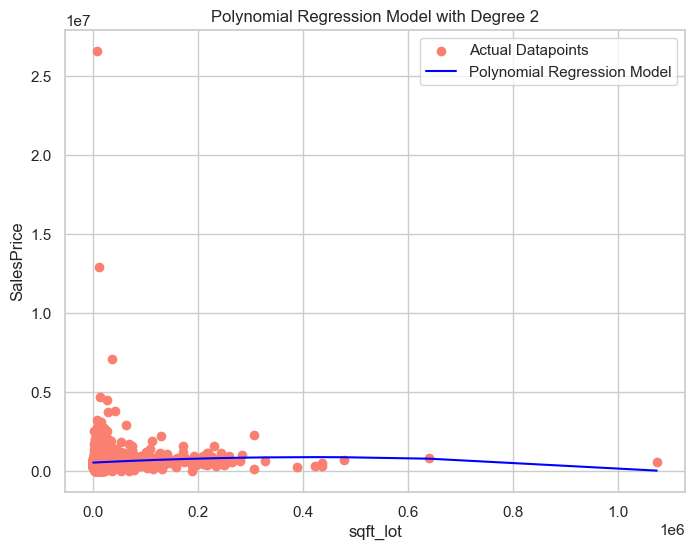

In [67]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import r2_score
# Predicting SalesPrice using the polynomial regression model
N_pred = poly_reg_model.predict(M_poly)
# Plotting the created polynomial regression model
plt.figure(figsize=(8, 6))
M_array = np.array(M).flatten()
sorted_order = np.argsort(M_array)
plt.scatter(M_array, N, color='salmon', label='Actual Datapoints')
plt.plot(M_array[sorted_order], N_pred[sorted_order], color='blue', label='Polynomial Regression Model')
plt.xlabel('sqft_lot')
plt.ylabel('SalesPrice')
plt.title('Polynomial Regression Model with Degree 2')
plt.legend()
plt.grid(True)
plt.show()

In [70]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
import numpy as np

# Define and fit a polynomial regression model
degree = 2  
poly_features = PolynomialFeatures(degree=degree)
X_poly_transformed = poly_features.fit_transform(X)  # Assuming X is your original feature matrix

poly_model = LinearRegression()
poly_model.fit(X_poly_transformed, y)

# Predict SalesPrice using the polynomial model
y_predicted = poly_model.predict(X_poly_transformed)

# Calculate R² score using the score() method of the model
r_squared = r2_score(y, y_predicted)

r2 = r2_score(N, N_pred)
print("R-squared score:", r2)

R-squared score: 0.00446670543314398


In [51]:
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
M = data_hp[['sqft_lot']]
N = data_hp['SalesPrice']
max_degree = 6  #not only limited to 6
mse_values_model = []
r2_values_model = []

for degree in range(1, max_degree + 1):
    poly = PolynomialFeatures(degree=degree)
    M_poly = poly.fit_transform(M)
    model = LinearRegression()  # Model fitting
    model.fit(M_poly, N)
    N_pred = model.predict(M_poly)
    mse = mean_squared_error(N, N_pred)
    r2 = r2_score(N, N_pred)
    mse_values_model.append(mse)
    r2_values_model.append(r2)
    print(f"Degree {degree}: R-squared (R²) Score: {r2}")

Degree 1: R-squared (R²) Score: 0.0025453331704339277
Degree 2: R-squared (R²) Score: 0.00446670543314398
Degree 3: R-squared (R²) Score: 0.007104702760799664
Degree 4: R-squared (R²) Score: 0.0017250395682145703
Degree 5: R-squared (R²) Score: 0.0005669714665621495
Degree 6: R-squared (R²) Score: 0.00018269514423274735


/Users/vaishnavimocherla/anaconda3/lib/python3.11/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


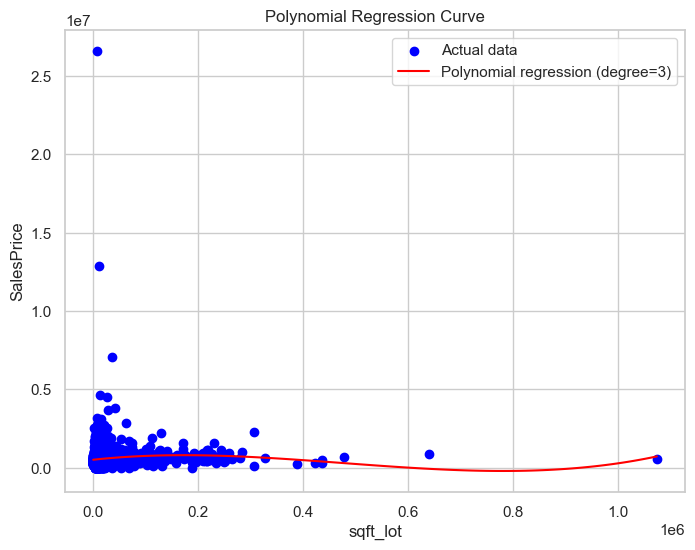

In [82]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

# Extracting the independent variable (feature) and the target variable
sqft_lot_feature = data_hp[['sqft_lot']]  
sales_price_target = data_hp['SalesPrice']  

# Defining the best degree based on our analysis
best_degree = 3

# Creating polynomial features of the best degree
poly = PolynomialFeatures(degree=best_degree)
sqft_lot_transformed = poly.fit_transform(sqft_lot_feature)

# Creating and fitting a Linear Regression model using polynomial features
polynomial_model = LinearRegression()
polynomial_model.fit(sqft_lot_transformed, sales_price_target)

# Generating points for plotting the polynomial regression curve
X_fit = np.linspace(sqft_lot_feature.min(), sqft_lot_feature.max(), 100).reshape(-1, 1)
X_fit_transformed = poly.transform(X_fit)
y_fit_predicted = polynomial_model.predict(X_fit_transformed)

# Setting a custom style for the plot

# Plotting the polynomial regression curve along with the actual data points
plt.figure(figsize=(8, 6))
plt.scatter(sqft_lot_feature, sales_price_target, label='Actual data', color='blue')
plt.plot(X_fit, y_fit_predicted, color='red', label=f'Polynomial regression (degree={best_degree})')
plt.title('Polynomial Regression Curve')
plt.xlabel('sqft_lot')
plt.ylabel('SalesPrice')
plt.legend()
plt.grid(True)
plt.show()


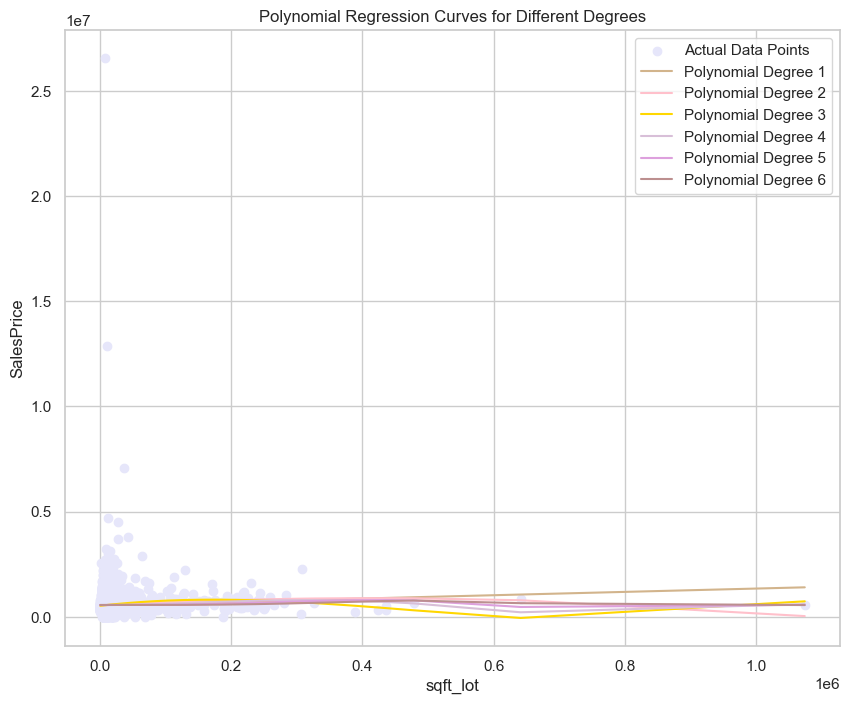

In [52]:
max_degree = 6  
colors = ['tan', 'pink', 'gold', 'thistle', 'plum', 'rosybrown']

# Plotting the polynomial model with actual data points
plt.figure(figsize=(10, 8))
plt.scatter(M, N, color='lavender', label='Actual Data Points')

# Plotting for each degree to show the difference
for degree in range(1, max_degree + 1):
    poly = PolynomialFeatures(degree=degree)
    M_poly = poly.fit_transform(M)
    model = LinearRegression()
    model.fit(M_poly, N)
    N_pred = model.predict(M_poly)
    M_array = M.to_numpy().flatten()
    sort_axis = np.argsort(M_array)
    M_sorted = M_array[sort_axis]
    N_pred_sorted = N_pred[sort_axis]

    plt.plot(
        M_sorted,
        N_pred_sorted,
        label=f'Polynomial Degree {degree}',
        color=colors[degree - 1]  
    )

plt.xlabel('sqft_lot')
plt.ylabel('SalesPrice')
plt.title('Polynomial Regression Curves for Different Degrees')
plt.legend()
plt.show()

## RANSAC (Robust Regression)

In [75]:
from sklearn.linear_model import RANSACRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

# Extracting the independent variable (feature) and the target variable
sqft_lot_feature = data_hp[['sqft_lot']]  # Independent variable (feature)
sales_price_target = data_hp['SalesPrice']   # Target variable

# Splitting the data into training and testing sets (for RANSAC)
X_train, X_test, y_train, y_test = train_test_split(sqft_lot_feature, sales_price_target, test_size=0.2, random_state=42)

# Creating a RANSACRegressor with a LinearRegression base estimator
ransac = RANSACRegressor(random_state=42)

# Fitting the RANSAC model
ransac.fit(X_train, y_train)

# Evaluating the model on the test set
inlier_mask = ransac.inlier_mask_
outlier_mask = np.logical_not(inlier_mask)

# Predicting SalePrice using the RANSAC model
y_pred = ransac.predict(X_test)

# Printing the R-squared (R²) score on the test set
r_squared = ransac.score(X_test, y_test)
print(f"R-squared (R²) score on the test set: {r_squared}")


R-squared (R²) score on the test set: -0.05387255518662659


Coefficients: 2.039113340024952
Intercept: 317528.7413906093


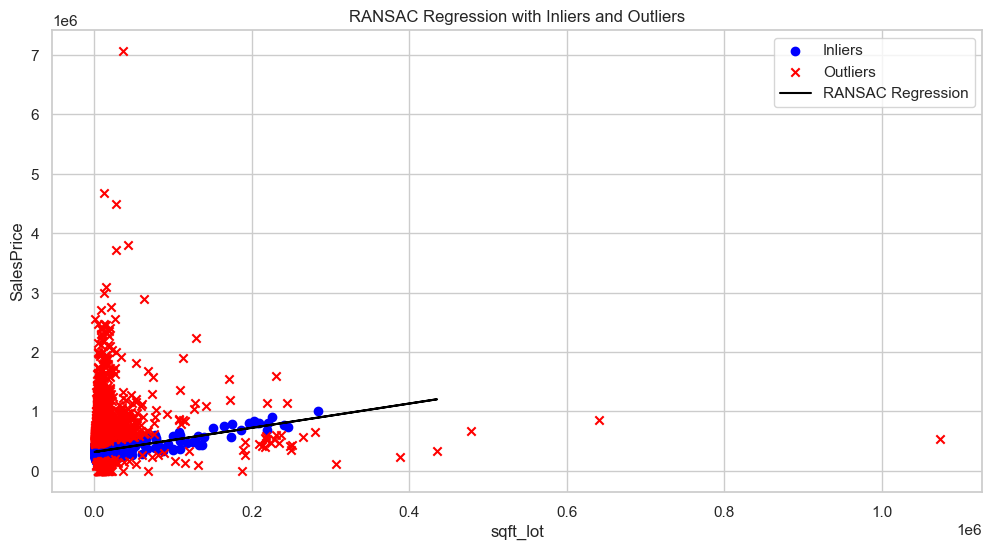

In [76]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import RANSACRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

# Printing coefficients and intercept
coef = ransac.estimator_.coef_[0]
intercept = ransac.estimator_.intercept_
print(f"Coefficients: {coef}")
print(f"Intercept: {intercept}")

# Set a custom style for the plot

# Plotting inliers and outliers
plt.figure(figsize=(12, 6))

plt.scatter(X_train[inlier_mask], y_train[inlier_mask], c='blue', marker='o', label='Inliers')
plt.scatter(X_train[outlier_mask], y_train[outlier_mask], c='red', marker='x', label='Outliers')
plt.plot(X_test, y_pred, color='black', label='RANSAC Regression')

plt.title('RANSAC Regression with Inliers and Outliers')
plt.xlabel('sqft_lot')
plt.ylabel('SalesPrice')
plt.legend()
plt.grid(True)
plt.show()



Q19) Print R-squared (R²) score with and without inliers.

In [78]:
from sklearn.linear_model import RANSACRegressor, LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

# Calculate R-squared (R²) score with all data
r_squared_all = r2_score(y_test, y_pred)

# Calculate R-squared (R²) score without inliers
ransac_without_inliers = RANSACRegressor(random_state=42)
ransac_without_inliers.fit(X_train[~inlier_mask], y_train[~inlier_mask])
y_pred_no_inliers = ransac_without_inliers.predict(X_test)

r_squared_no_inliers = r2_score(y_test, y_pred_no_inliers)

print(f"R-squared (R²) score with all data: {r_squared_all}")
print(f"R-squared (R²) score without inliers: {r_squared_no_inliers}")


R-squared (R²) score with all data: -0.05387255518662659
R-squared (R²) score without inliers: -0.6513534830175647


In [81]:
# Calculate R-squared score excluding outliers (inliers only)
y_pred_inliers = ransac.predict(X_train[inlier_mask])
r_squared_inliers = r2_score(y_train[inlier_mask], y_pred_inliers)
print(f"R-squared (R²) score excluding outliers (inliers only): {r_squared_inliers}")


R-squared (R²) score excluding outliers (inliers only): 0.23561361261444547


##  Model Evaluation

# Part 3

In [84]:
import pandas as pd
#loading the dataset
data_le = pd.read_csv('LifeExpectancy.csv')
print(data_le.head())
#displaying the statistics of the given data
data_le.describe()

       Country  Year      Status  Life expectancy  Adult Mortality  \
0  Afghanistan  2015  Developing             65.0            263.0   
1  Afghanistan  2014  Developing             59.9            271.0   
2  Afghanistan  2013  Developing             59.9            268.0   
3  Afghanistan  2012  Developing             59.5            272.0   
4  Afghanistan  2011  Developing             59.2            275.0   

   infant deaths  Alcohol  percentage expenditure  Hepatitis B  Measles  ...  \
0             62     0.01               71.279624         65.0     1154  ...   
1             64     0.01               73.523582         62.0      492  ...   
2             66     0.01               73.219243         64.0      430  ...   
3             69     0.01               78.184215         67.0     2787  ...   
4             71     0.01                7.097109         68.0     3013  ...   

   Polio  Total expenditure  Diphtheria   HIV/AIDS         GDP  Population  \
0    6.0            

,Year,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
count,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2.938000e+03,2938.000000,2938.000000,2938.000000,2938.000000
mean,2007.518720,69.234717,164.725664,30.303948,4.546875,738.251295,83.022124,2419.592240,38.381178,42.035739,82.617767,5.924098,82.393125,1.742103,6611.523863,1.023085e+07,4.821886,4.852144,0.630362,12.009837
std,4.613841,9.509115,124.086215,117.926501,3.921946,1987.914858,22.996984,11467.272489,19.935375,160.445548,23.367166,2.400770,23.655562,5.077785,13296.603449,5.402242e+07,4.397621,4.485854,0.205140,3.265139
min,2000.000000,36.300000,1.000000,0.000000,0.010000,0.000000,1.000000,0.000000,1.000000,0.000000,3.000000,0.370000,2.000000,0.100000,1.681350,3.400000e+01,0.100000,0.100000,0.000000,0.000000
25%,2004.000000,63.200000,74.000000,0.000000,1.092500,4.685343,82.000000,0.000000,19.400000,0.000000,78.000000,4.370000,78.000000,0.100000,580.486996,4.189172e+05,1.600000,1.600000,0.504250,10.300000
50%,2008.000000,72.100000,144.000000,3.000000,3.755000,64.912906,92.000000,17.000000,43.500000,4.000000,93.000000,5.755000,93.000000,0.100000,1766.947595,1.386542e+06,3.300000,3.300000,0.677000,12.300000
75%,2012.000000,75.600000,227.000000,22.000000,7.390000,441.534144,96.000000,360.250000,56.100000,28.000000,97.000000,7.330000,97.000000,0.800000,4779.405190,4.584371e+06,7.100000,7.200000,0.772000,14.100000
max,2015.000000,89.000000,723.000000,1800.000000,17.870000,19479.911610,99.000000,212183.000000,87.300000,2500.000000,99.000000,17.600000,99.000000,50.600000,119172.741800,1.293859e+09,27.700000,28.600000,0.948000,20.700000


In [85]:
#Finding the target variable
target_variable_data = 'Life expectancy'
# Displaying the target variable
print("The Target Variable in the dataset is :", target_variable_data)

The Target Variable in the dataset is : Life expectancy


In [86]:
# Segregating the columns into categorical and continuous columns
Categorical_Columns = data_le.select_dtypes(include=['object']).columns.tolist()
Continuous_Columns = data_le.select_dtypes(exclude=['object']).columns.tolist()
# showing the categorical and continuous columns
print("Categorical Features present in the Dataset are :\n" + ", ".join(Categorical_Columns))
print("\nContinuous Features present in the Dataset are :\n" + ", ".join(Continuous_Columns))

Categorical Features present in the Dataset are :
Country, Status

Continuous Features present in the Dataset are :
Year, Life expectancy, Adult Mortality, infant deaths, Alcohol, percentage expenditure, Hepatitis B, Measles, BMI, under-five deaths , Polio, Total expenditure, Diphtheria,  HIV/AIDS, GDP, Population, thinness  1-19 years, thinness 5-9 years, Income composition of resources, Schooling


In [88]:
#finding out the number of unique values in the columns
distinct_values_data = data_le.nunique()
print(distinct_values_data)

Country                             193
Year                                 16
Status                                2
Life expectancy                     362
Adult Mortality                     425
infant deaths                       209
Alcohol                            1077
percentage expenditure             2328
Hepatitis B                          87
Measles                             958
BMI                                 608
under-five deaths                   252
Polio                                73
Total expenditure                   819
Diphtheria                           81
 HIV/AIDS                           200
GDP                                2491
Population                         2279
thinness  1-19 years                200
thinness 5-9 years                  207
Income composition of resources     625
Schooling                           173
dtype: int64


In [89]:
# finding missing values
missing_values = data_le.isnull().sum()
for column, count in missing_values.items():       
    print(f"The column '{column}' has {count} missing values.")

The column 'Country' has 0 missing values.
The column 'Year' has 0 missing values.
The column 'Status' has 0 missing values.
The column 'Life expectancy' has 0 missing values.
The column 'Adult Mortality' has 0 missing values.
The column 'infant deaths' has 0 missing values.
The column 'Alcohol' has 0 missing values.
The column 'percentage expenditure' has 0 missing values.
The column 'Hepatitis B' has 0 missing values.
The column 'Measles' has 0 missing values.
The column 'BMI' has 0 missing values.
The column 'under-five deaths ' has 0 missing values.
The column 'Polio' has 0 missing values.
The column 'Total expenditure' has 0 missing values.
The column 'Diphtheria' has 0 missing values.
The column ' HIV/AIDS' has 0 missing values.
The column 'GDP' has 0 missing values.
The column 'Population' has 0 missing values.
The column 'thinness  1-19 years' has 0 missing values.
The column 'thinness 5-9 years' has 0 missing values.
The column 'Income composition of resources' has 0 missing v

In [90]:
# verifying that there are no missing values present in the dataset
missing_values = data_le.isnull().sum()
missing_values = missing_values[missing_values > 0]
if missing_values.empty:
    print("There are no missing values in the dataset.")
else:
    # Print the missing values in a descriptive format
    for column, count in missing_values.items():
        print(f"The column '{column}' has {count} missing values.")

There are no missing values in the dataset.


In [91]:
missing_values     # hence, no missing values are found in the dataset

Series([], dtype: int64)

In [92]:
# checking for the outliers in each column
for column in data_le.select_dtypes(include=['float64', 'int64']).columns:
    Quartile_1 = data_le[column].quantile(0.25)
    Quartile_3 = data_le[column].quantile(0.75)
    IQR = Quartile_3 - Quartile_1
    lower_bound = Quartile_1 - 1.5 * IQR
    upper_bound = Quartile_3 + 1.5 * IQR
    outliers = data_le[(data_le[column] < lower_bound) | (data_le[column] > upper_bound)][column]
    print(f"The column '{column}' has {outliers.count()} outliers.")

The column 'Year' has 0 outliers.
The column 'Life expectancy' has 17 outliers.
The column 'Adult Mortality' has 86 outliers.
The column 'infant deaths' has 315 outliers.
The column 'Alcohol' has 3 outliers.
The column 'percentage expenditure' has 389 outliers.
The column 'Hepatitis B' has 322 outliers.
The column 'Measles' has 542 outliers.
The column 'BMI' has 0 outliers.
The column 'under-five deaths ' has 394 outliers.
The column 'Polio' has 279 outliers.
The column 'Total expenditure' has 51 outliers.
The column 'Diphtheria' has 298 outliers.
The column ' HIV/AIDS' has 542 outliers.
The column 'GDP' has 445 outliers.
The column 'Population' has 452 outliers.
The column 'thinness  1-19 years' has 100 outliers.
The column 'thinness 5-9 years' has 99 outliers.
The column 'Income composition of resources' has 130 outliers.
The column 'Schooling' has 77 outliers.


In [93]:
def impute_outliers(df, column):
    Quartile_1 = df[column].quantile(0.25)
    Quartile_3 = df[column].quantile(0.75)
    IQR = Quartile_3 - Quartile_1
    lower_bound = Quartile_1 - 1.5 * IQR
    upper_bound = Quartile_3 + 1.5 * IQR
    
    outliers_condition = (df[column] < lower_bound) | (df[column] > upper_bound)
    
    if df[column].skew() < -1 or df[column].skew() > 1:
        df.loc[outliers_condition, column] = df[column].median()
    else:
        df.loc[outliers_condition, column] = df[column].mean()

for column in data_le.select_dtypes(include=['float64', 'int64']).columns:
    impute_outliers(data_le, column)

for column in data_le.select_dtypes(include=['float64', 'int64']).columns:
    Quartile_1 = data_le[column].quantile(0.25)
    Quartile_3 = data_le[column].quantile(0.75)
    IQR = Quartile_3 - Quartile_1
    lower_bound = Quartile_1 - 1.5 * IQR
    upper_bound = Quartile_3 + 1.5 * IQR
    outliers = data_le[(data_le[column] < lower_bound) | (data_le[column] > upper_bound)][column]
    print(f"After imputation, the column '{column}' has {outliers.count()} outliers.")

After imputation, the column 'Year' has 0 outliers.
After imputation, the column 'Life expectancy' has 3 outliers.
After imputation, the column 'Adult Mortality' has 22 outliers.
After imputation, the column 'infant deaths' has 410 outliers.
After imputation, the column 'Alcohol' has 0 outliers.
After imputation, the column 'percentage expenditure' has 373 outliers.
After imputation, the column 'Hepatitis B' has 323 outliers.
After imputation, the column 'Measles' has 518 outliers.
After imputation, the column 'BMI' has 0 outliers.
After imputation, the column 'under-five deaths ' has 415 outliers.
After imputation, the column 'Polio' has 236 outliers.
After imputation, the column 'Total expenditure' has 23 outliers.
After imputation, the column 'Diphtheria' has 209 outliers.
After imputation, the column ' HIV/AIDS' has 615 outliers.
After imputation, the column 'GDP' has 324 outliers.
After imputation, the column 'Population' has 455 outliers.
After imputation, the column 'thinness  1

In [94]:
numerical_summary = data_le.describe()
numerical_summary

,Year,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
count,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2.938000e+03,2938.000000,2938.000000,2938.000000,2938.000000
mean,2007.518720,69.387131,152.805990,8.059905,4.533761,147.419882,90.406399,70.735194,38.381178,9.115044,89.487406,5.788979,89.714091,0.213376,2032.767562,1.720022e+06,4.277332,4.291491,0.660318,12.187766
std,4.613841,9.292743,103.551548,12.754371,3.900368,227.749792,8.278288,158.299914,19.935375,14.810333,10.783820,2.152299,10.287456,0.305162,1968.993201,2.019180e+06,3.390476,3.421240,0.153925,2.850211
min,2000.000000,44.800000,1.000000,0.000000,0.010000,0.000000,61.000000,0.000000,1.000000,0.000000,51.000000,0.370000,51.000000,0.100000,1.681350,3.400000e+01,0.100000,0.100000,0.253000,4.700000
25%,2004.000000,63.425000,74.000000,0.000000,1.092500,4.685343,89.000000,0.000000,19.400000,0.000000,86.000000,4.370000,86.000000,0.100000,580.486996,4.189172e+05,1.600000,1.600000,0.554000,10.500000
50%,2008.000000,72.100000,144.000000,3.000000,3.755000,64.884537,92.000000,17.000000,43.500000,4.000000,93.000000,5.755000,93.000000,0.100000,1766.947595,1.386542e+06,3.300000,3.300000,0.677000,12.300000
75%,2012.000000,75.600000,218.000000,9.000000,7.380000,168.945236,96.000000,36.000000,56.100000,9.000000,97.000000,7.150000,97.000000,0.100000,2178.012010,1.386542e+06,6.600000,6.600000,0.772000,14.100000
max,2015.000000,89.000000,454.000000,55.000000,16.580000,1092.155356,99.000000,899.000000,87.300000,70.000000,99.000000,11.710000,99.000000,1.800000,9985.369590,9.999617e+06,15.300000,15.500000,0.948000,19.700000


In [95]:
from sklearn.preprocessing import LabelEncoder
#using label encoding
label_encoder = LabelEncoder()
# Identifying the columns to be encoded and applying encoding to these particular columns
data_le['Country'] = label_encoder.fit_transform(data_le['Country'])
data_le['Status'] = label_encoder.fit_transform(data_le['Status'])
print(data_le[["Country", "Status"]])

      Country  Status
0           0       1
1           0       1
2           0       1
3           0       1
4           0       1
...       ...     ...
2933      192       1
2934      192       1
2935      192       1
2936      192       1
2937      192       1

[2938 rows x 2 columns]


In [96]:
from sklearn.preprocessing import StandardScaler
# initializing the standard scaler from sklearn library
scaler = StandardScaler()
# choosing the columns to be normalized
columns_to_normalize = ['Adult Mortality', 'BMI', 'GDP']
#performing normalisation on the selected features
data_le[columns_to_normalize] = scaler.fit_transform(data_le[columns_to_normalize])
print(data_le[columns_to_normalize])

      Adult Mortality       BMI       GDP
0            1.064328 -0.967349 -0.735785
1            1.141597 -0.992434 -0.721340
2            1.112621 -1.017519 -0.711664
3            1.151256 -1.042605 -0.692253
4            1.180232 -1.062673 -1.000291
...               ...       ...       ...
2933        -0.085054 -0.565984 -0.801765
2934        -0.085054 -0.586052 -0.802281
2935        -0.770820 -0.606120 -1.003434
2936        -0.085054 -0.626188 -0.753905
2937        -0.085054 -0.646257 -0.754529

[2938 rows x 3 columns]


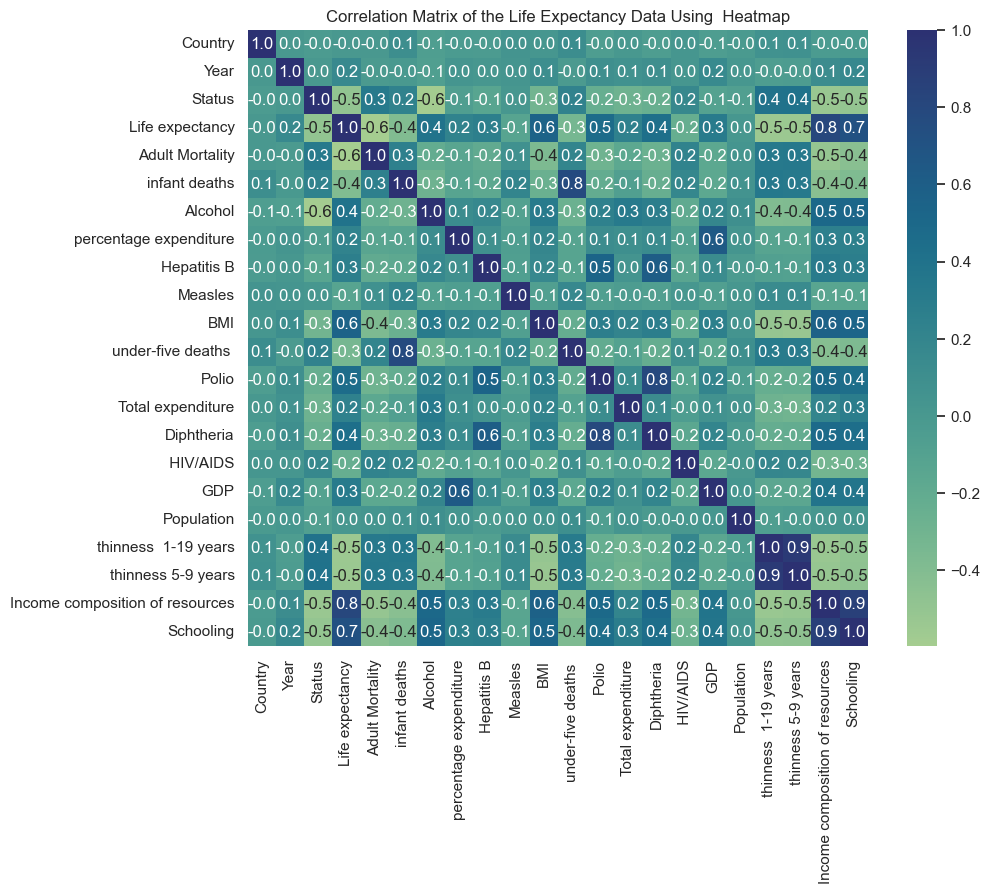

In [99]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# computing the correlation matrix
correlation_matrix = data_le.corr()

# Plotting  the correlation heatmap with the palette of crest from sns library
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="crest", fmt=".1f")
plt.title("Correlation Matrix of the Life Expectancy Data Using  Heatmap")
plt.show()

In [100]:
#Finding the features which are most positively and negatively correlated with the target variable, ie life expectancy

target_variable = "Life expectancy"  # Replace with the actual name of your target variable

positive_corr_features = correlation_matrix[target_variable].sort_values(ascending=False).head(5)

negative_corr_features = correlation_matrix[target_variable].sort_values(ascending=True).head(5)

print("Features in the data that are Most Positively Correlated with Target Variable:")
print(positive_corr_features)
print("\nFeatures in the data that are Most Negatively Correlated with Target Variable:")
print(negative_corr_features)

Features in the data that are Most Positively Correlated with Target Variable:
Life expectancy                    1.000000
Income composition of resources    0.810278
Schooling                          0.717561
BMI                                0.555745
Polio                              0.457437
Name: Life expectancy, dtype: float64

Features in the data that are Most Negatively Correlated with Target Variable:
Adult Mortality        -0.596754
thinness  1-19 years   -0.544893
thinness 5-9 years     -0.539066
Status                 -0.485088
infant deaths          -0.396389
Name: Life expectancy, dtype: float64


In [101]:
from sklearn.model_selection import train_test_split
# droping the column country
data_without_country = data_le.drop('Country', axis=1)
# Spliting the dataset into features  called (X) and target (y)
X = data_without_country.drop('Life expectancy', axis=1)  
y = data_without_country['Life expectancy']  
# splitting the train and test data into 70:30 ratio
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
#viewing the detailed info of the data after splitting
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (2056, 20)
X_test shape: (882, 20)
y_train shape: (2056,)
y_test shape: (882,)


In [102]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
# creating the linear regression model to compute the mae
model = LinearRegression()
# performing linear regression on the train data
model.fit(X_train, y_train)
# creating predictions on the test data
y_pred = model.predict(X_test)
#Finally, calculating the mean absolute error
mae = mean_absolute_error(y_test, y_pred)
# displaying the mae
print("The model has acheived Mean Absolute Error (MAE) as:", mae)

The model has acheived Mean Absolute Error (MAE) as: 3.2757857484101107


In [103]:
from sklearn.linear_model import SGDRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import numpy as np
import pandas as pd
X = data_le.drop('Life expectancy', axis=1)
y = data_le['Life expectancy']
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Splitting the dataset into train and test data
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

# Stochastic Gradient Descent Model
sgd_model = SGDRegressor(alpha=0.0001, learning_rate='invscaling', max_iter=1000, random_state=42)
sgd_model.fit(X_train, y_train)
y_pred_sgd = sgd_model.predict(X_test)
mae_sgd = mean_absolute_error(y_test, y_pred_sgd)

# creating the mini batch
def mini_batch_gradient_descent(X, y, learning_rate=0.0001, max_iter=1000, batch_size=32):
    m, n = X.shape
    X_b = np.c_[np.ones((m, 1)), X]  # including bias 
    theta = np.random.randn(n + 1, 1)  # starting intialisations randomly
    y = y.values.reshape(-1, 1)  # modifying y column to column vector

    for iteration in range(max_iter):
        indices = np.random.permutation(m)
        X_b_shuffled = X_b[indices]
        y_shuffled = y[indices]
        
        for i in range(0, m, batch_size):
            xi = X_b_shuffled[i:i + batch_size]
            yi = y_shuffled[i:i + batch_size]
            gradients = 2/batch_size * xi.T.dot(xi.dot(theta) - yi)
            theta -= learning_rate * gradients

    return theta

# Applying Mini Batch Gradient Descent
theta = mini_batch_gradient_descent(X_train, y_train, learning_rate=0.0001, max_iter=1000, batch_size=32)
X_test_b = np.c_[np.ones((X_test.shape[0], 1)), X_test]  
y_pred_mini_batch = X_test_b.dot(theta)
mae_mini_batch = mean_absolute_error(y_test, y_pred_mini_batch)
print("The SGD model acheived Mean Absolute Error as :", mae_sgd)
print("the Mini Batch Gradient Descent model acheived MAE as :", mae_mini_batch)

The SGD model acheived Mean Absolute Error as : 3.2780324572113395
the Mini Batch Gradient Descent model acheived MAE as : 3.291397583229442


In [104]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.preprocessing import StandardScaler
target_column = "Life expectancy"           #mentioning the target column
X = data_le.drop(columns=[target_column])
y = data_le[target_column]
# splitting the data manually
train_size = int(0.7 * len(data_le))
np.random.seed(42)  
shuffled_indices = np.random.permutation(len(data_le))
train_indices = shuffled_indices[:train_size]
test_indices = shuffled_indices[train_size:]

X_train_manual = X.iloc[train_indices]
y_train_manual = y.iloc[train_indices]
X_test_manual = X.iloc[test_indices]
y_test_manual = y.iloc[test_indices]
#mean and std of the data manually
mean = X_train_manual.mean()
std = X_train_manual.std()
X_train_scaled_manual = (X_train_manual - mean) / std
X_test_scaled_manual = (X_test_manual - mean) / std

# Building and training a Mini Batch Gradient Descent model manually
learning_rate = 0.0001
max_iter = 1000
batch_size = 32
num_batches = len(X_train_scaled_manual) // batch_size

#creating weights and bias
np.random.seed(42)
theta = np.random.randn(X_train_scaled_manual.shape[1])
bias = np.random.randn()

for iteration in range(max_iter):
    for batch in range(num_batches):
        start_idx = batch * batch_size
        end_idx = (batch + 1) * batch_size
        X_batch = X_train_scaled_manual[start_idx:end_idx]
        y_batch = y_train_manual[start_idx:end_idx]
        
        # finding the predictions
        y_pred_batch = np.dot(X_batch, theta) + bias
        
        # finding the gradients
        gradient = -(1 / batch_size) * np.dot(X_batch.T, (y_batch - y_pred_batch))
        bias_gradient = -(1 / batch_size) * np.sum(y_batch - y_pred_batch)
        
        #modifying the bias and weights by updating values from the previous steps
        theta -= learning_rate * gradient
        bias -= learning_rate * bias_gradient


#getting predictions on the test data
y_pred_mini_batch_manual = np.dot(X_test_scaled_manual, theta) + bias

# finding mae manually
mae_mini_batch_manual = np.mean(np.abs(y_test_manual - y_pred_mini_batch_manual))

# Print the MAE for Mini Batch Gradient Descent
print("MAE for Mini Batch Gradient Descent (Manual):", mae_mini_batch_manual)

MAE for Mini Batch Gradient Descent (Manual): 3.516421496384101
